In [17]:
#Importando Biblioteca 

In [18]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
!pip install pyfolio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import seaborn as sns
import pyfolio as pf
import warnings
warnings.filterwarnings('ignore')

In [21]:
# Para corrgir o bug: AttributeError: 'numpy.int64' object has no attribute 'to_pydatetime'
!pip install git+https://github.com/quantopian/pyfolio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/quantopian/pyfolio to /tmp/pip-req-build-l3kzlbyl
  Running command git clone -q https://github.com/quantopian/pyfolio /tmp/pip-req-build-l3kzlbyl


In [22]:
#obtendo Dados 

In [23]:
tickers = "ABEV3.SA ITSA4.SA WEGE3.SA USIM5.SA VALE3.SA ^BVSP"
dados_yahoo = yf.download(tickers=tickers, period="5y")['Adj Close']

[*********************100%***********************]  6 of 6 completed


In [24]:
dados_yahoo

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,^BVSP
Date,,,,,,
2017-09-22,18.668734,7.277853,7.987752,22.082165,7.854821,75390.000000
2017-09-25,18.651381,7.199385,6.993533,21.514711,7.804749,74443.000000
2017-09-26,18.373781,7.192847,7.104002,21.798437,7.636634,74319.000000
2017-09-27,18.304380,7.088222,6.772595,22.096004,7.550792,73797.000000
2017-09-28,18.269676,7.075146,6.449687,21.971441,7.540058,73567.000000
...,...,...,...,...,...,...
2022-09-16,15.270000,9.280000,7.650000,68.250000,30.480000,109280.000000
2022-09-19,15.470000,9.560000,8.050000,70.459999,30.600000,111824.000000
2022-09-20,15.760000,9.830000,7.830000,69.449997,31.129999,112517.000000


In [25]:
retorno = dados_yahoo.pct_change()
retorno

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,^BVSP
Date,,,,,,
2017-09-22,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-25,-0.000930,-0.010782,-0.124468,-0.025697,-0.006375,-0.012561
2017-09-26,-0.014884,-0.000908,0.015796,0.013188,-0.021540,-0.001666
2017-09-27,-0.003777,-0.014546,-0.046651,0.013651,-0.011241,-0.007024
2017-09-28,-0.001896,-0.001845,-0.047679,-0.005637,-0.001422,-0.003117
...,...,...,...,...,...,...
2022-09-16,-0.001961,-0.007487,-0.016710,-0.001463,0.015661,-0.006130
2022-09-19,0.013098,0.030172,0.052288,0.032381,0.003937,0.023280
2022-09-20,0.018746,0.028243,-0.027329,-0.014334,0.017320,0.006197


In [26]:
retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,^BVSP
Date,,,,,,
2017-09-22,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2017-09-25,0.999070,0.989218,0.875532,0.974303,0.993625,0.987439
2017-09-26,0.984201,0.988320,0.889362,0.987151,0.972223,0.985794
2017-09-27,0.980483,0.973944,0.847872,1.000627,0.961294,0.978870
2017-09-28,0.978624,0.972147,0.807447,0.994986,0.959927,0.975819
...,...,...,...,...,...,...
2022-09-16,0.817945,1.275101,0.957716,3.090730,3.880420,1.449529
2022-09-19,0.828658,1.313574,1.007793,3.190810,3.895697,1.483274
2022-09-20,0.844192,1.350673,0.980251,3.145072,3.963171,1.492466


In [27]:
carteira = 10000 * retorno_acumulado.iloc[:,: 5]
carteira["saldo"] = carteira.sum(axis=1)
carteira["retorno"] = carteira ["saldo"].pct_change()
carteira

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,saldo,retorno
Date,,,,,,,
2017-09-22,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,50000.000000,NaN
2017-09-25,9990.704748,9892.182700,8755.320335,9743.026379,9936.252914,48317.487076,-0.033650
2017-09-26,9842.007284,9883.199400,8893.618142,9871.512758,9722.226151,48212.563734,-0.002172
2017-09-27,9804.832407,9739.441034,8478.724124,10006.267375,9612.939622,47642.204563,-0.011830
2017-09-28,9786.242925,9721.474433,8074.470328,9949.858405,9599.274632,47131.320723,-0.010723
...,...,...,...,...,...,...,...
2022-09-16,8179.451690,12751.012857,9577.162231,30907.295878,38804.195024,100219.117681,0.002782
2022-09-19,8286.582583,13135.742648,10077.928996,31908.103139,38956.968516,102365.325883,0.021415
2022-09-20,8441.922505,13506.730498,9802.507007,31450.719478,39631.711833,102833.591321,0.004574


In [28]:
# resultado

Start date,2017-09-22
End date,2022-09-22
Total months,59
,Backtest
Annual return,15.639%
Cumulative returns,104.891%
Annual volatility,28.223%
Sharpe ratio,0.66
Calmar ratio,0.41
Stability,0.78
Max drawdown,-38.136%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,38.14,2020-02-19,2020-03-18,2020-07-15,106
1,32.44,2021-07-28,2022-07-14,NaT,NaN
2,20.55,2018-02-26,2018-06-21,2019-07-01,351
3,13.19,2019-07-10,2019-08-26,2019-11-07,87
4,12.63,2021-01-08,2021-03-24,2021-07-12,132


Stress Events,mean,min,max
New Normal,0.07%,-14.09%,11.16%


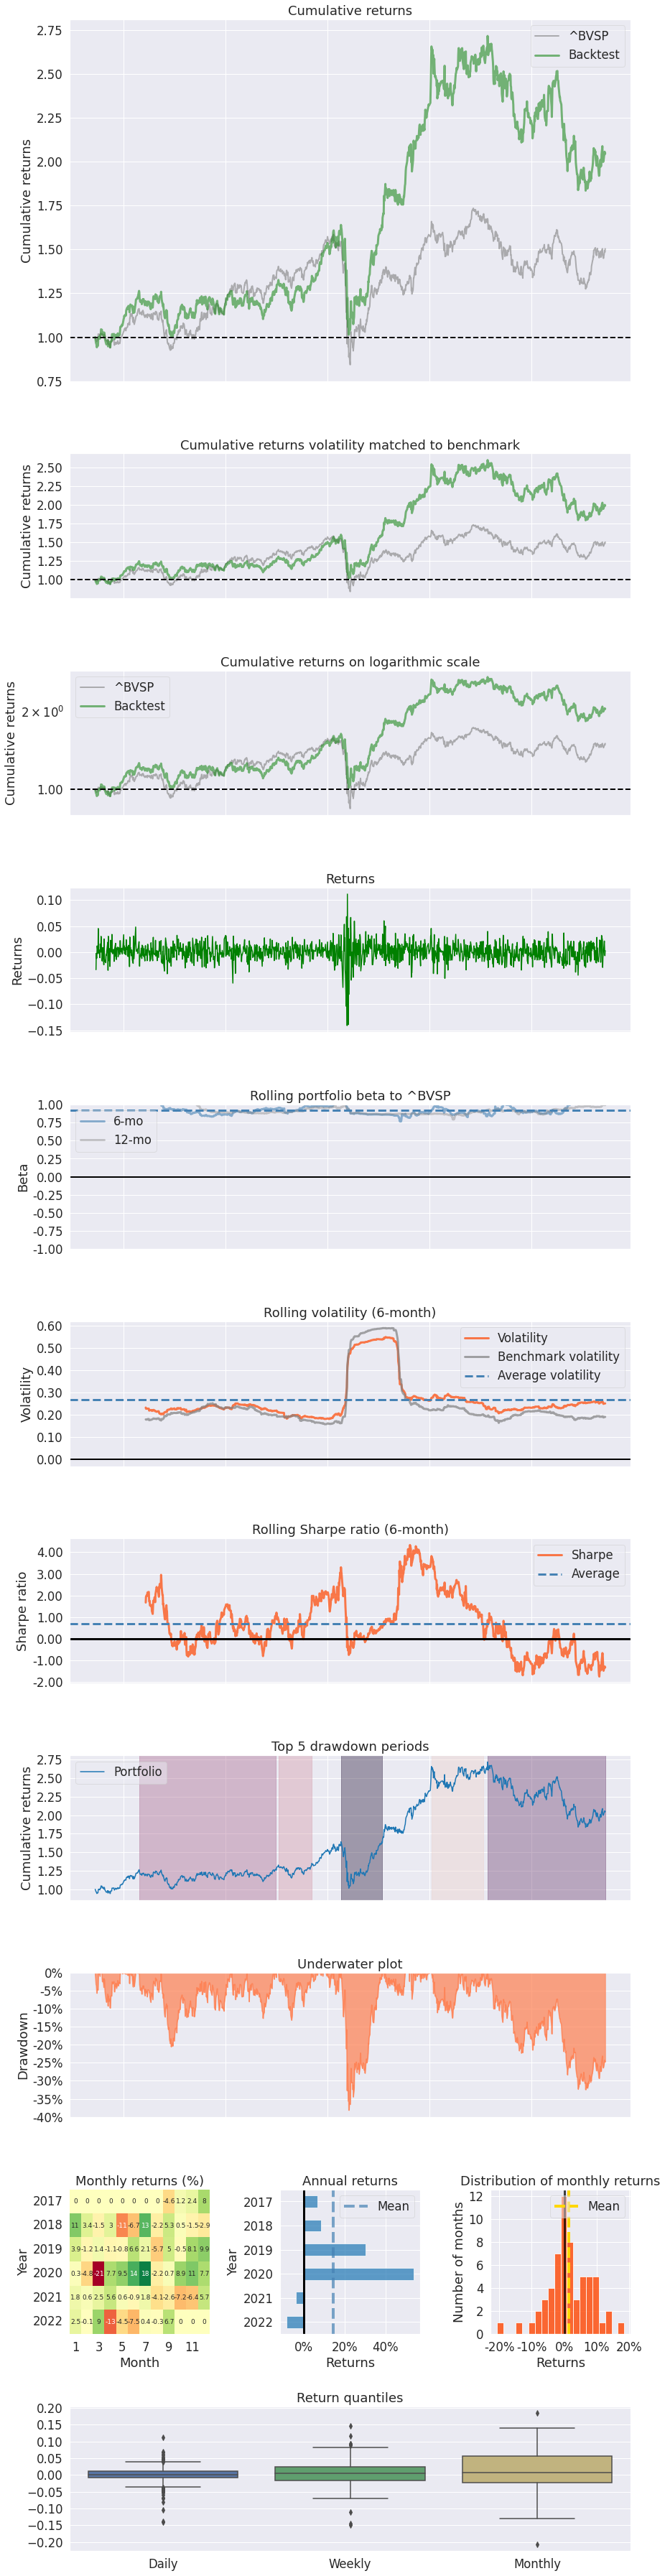

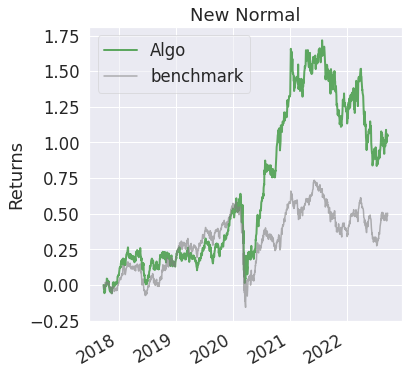

In [29]:
pf.create_full_tear_sheet(carteira["retorno"], benchmark_rets=retorno["^BVSP"])

(0.8, 1.4)

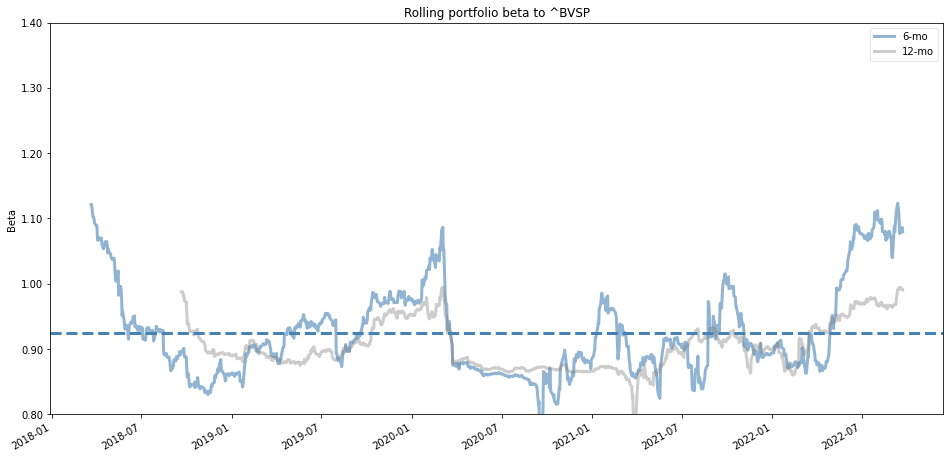

In [30]:
fig, ax1 = plt.subplots(figsize=(16,8))
pf.plot_rolling_beta(carteira["retorno"], factor_returns=retorno["^BVSP"], ax=ax1)
plt.ylim((0.8 , 1.4))